# PB&DP ANALYSIS

In [1]:
## import packages

import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
## read all data to rawdata, first 128 have doubleplay

rawdata = pd.read_csv('PB.csv', header=0)

print(rawdata.shape)
print(rawdata.dtypes)

(308, 4)
Date       object
Number     object
Jackpot    object
DP         object
dtype: object


In [3]:
## have a look at rawdata

rawdata.head(10)

,Date,Number,Jackpot,DP
0,"Mon, Jul 04, 2022",15-16-24-31-56 PB: 4 PP: 2,$26 Million,60-41-9-57-55 PB: 5
1,"Sat, Jul 02, 2022",9-10-37-59-62 PB: 26 PP: 3,$20 Million,4-22-59-57-7 PB: 24
2,"Wed, Jun 29, 2022",8-40-49-58-63 PB: 14 PP: 3,$365 Million,11-26-28-60-34 PB: 5
3,"Mon, Jun 27, 2022",11-13-18-30-37 PB: 16 PP: 3,$346 Million,68-57-47-53-34 PB: 2
4,"Sat, Jun 25, 2022",6-12-20-27-32 PB: 4 PP: 3,$335 Million,69-58-46-63-16 PB: 18
5,"Wed, Jun 22, 2022",6-10-31-48-56 PB: 12 PP: 3,$312 Million,53-31-7-39-51 PB: 21
6,"Mon, Jun 20, 2022",3-44-61-63-69 PB: 13 PP: 2,$296 Million,56-43-27-26-4 PB: 18
7,"Sat, Jun 18, 2022",10-19-40-45-58 PB: 25 PP: 2,$279 Million,23-30-7-53-18 PB: 3
8,"Wed, Jun 15, 2022",19-28-41-42-51 PB: 7 PP: 2,$258 Million,44-48-67-47-3 PB: 11
9,"Mon, Jun 13, 2022",2-27-42-44-51 PB: 25 PP: 2,$243 Million,8-20-67-48-35 PB: 15


In [4]:
## create empty finedata to store all independent numbers

finedata = pd.DataFrame(columns=['PB1','PB2','PB3','PB4','PB5','PB','PP','Jackpot','DP1','DP2','DP3','DP4','DP5','DP'])

In [5]:
## extract numbers of first 128 rows with DP

for i in range(128):

    finedata = finedata.append({'PB1':'NaN'}, ignore_index=True)  # append one empty line for adding values
   
    num = re.findall(r'\d+', str(rawdata.Number[i]))  # PB1 PB2 PB3 PB4 PB5 PB
    for k in range(7):  # input numbers into finedata
        finedata.iloc[[i],[k]] = num[k]

    finedata.iloc[[i],[7]] = re.findall(r'\d+', str(rawdata.Jackpot[i]))  # Jackpot
    
    num =  re.findall(r'\d+', str(rawdata.DP[i]))  #  DP1 DP2 DP3 DP4 DP5 DP
    for k in range(6):  # input numbers into finedata
        finedata.iloc[[i],[k+8]] = num[k]

In [6]:
## convert entire dataframe to int

finedata = finedata.apply(pd.to_numeric)

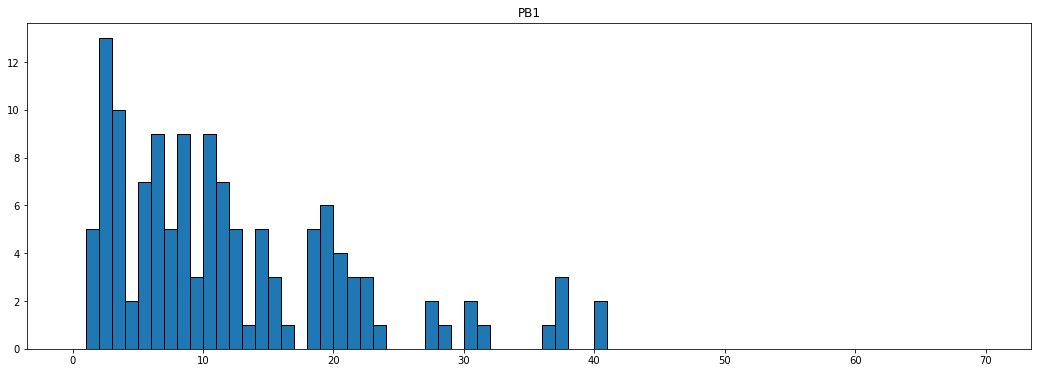

In [28]:
## PB1
plt.figure(figsize=(18,6))
plt.title('PB1')
plt.hist(finedata.PB1.tolist(), bins=range(0,71,1), edgecolor='k')
plt.show()

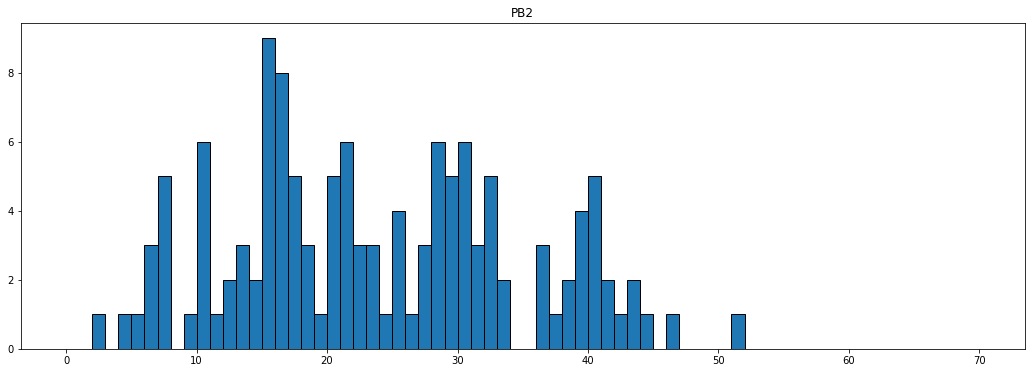

In [29]:
## PB2
plt.figure(figsize=(18,6))
plt.title('PB2')
plt.hist(finedata.PB2.tolist(), bins=range(0,71,1), edgecolor='k')
plt.show()

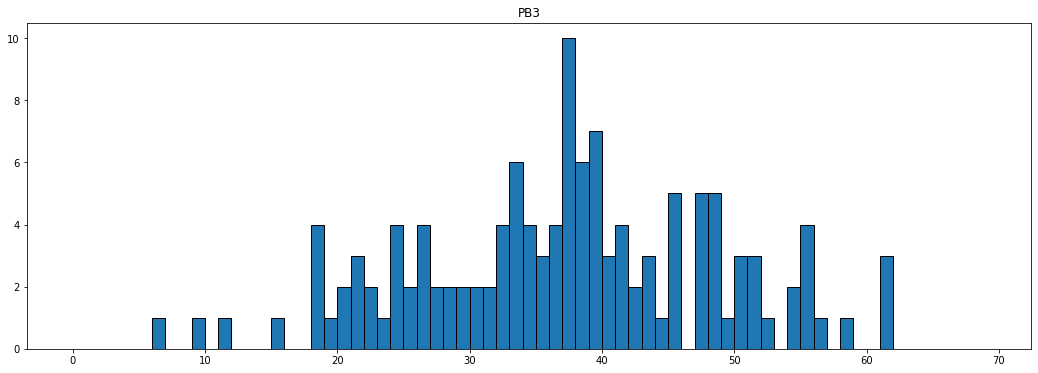

In [9]:
## PB3
plt.figure(figsize=(18,6))
plt.title('PB3')
plt.hist(finedata.PB3.tolist(), bins=range(0,70,1), edgecolor='k')
plt.show()

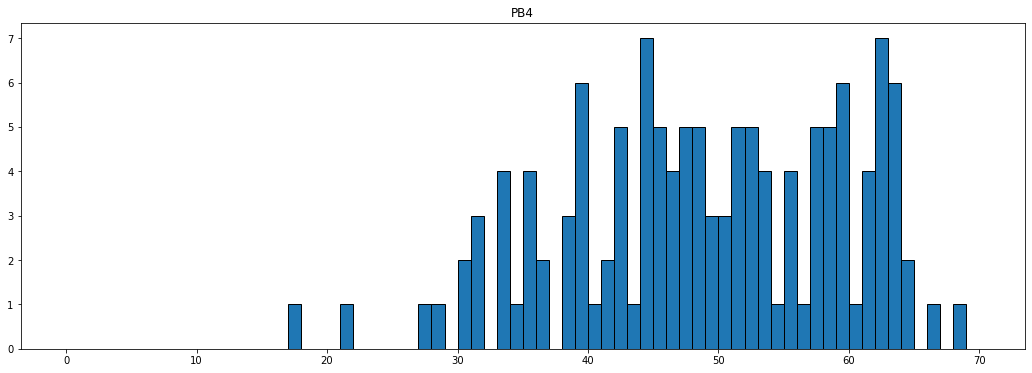

In [34]:
## PB4
plt.figure(figsize=(18,6))
plt.title('PB4')
plt.hist(finedata.PB4.tolist(), bins=range(0,71,1), edgecolor='k')
plt.show()

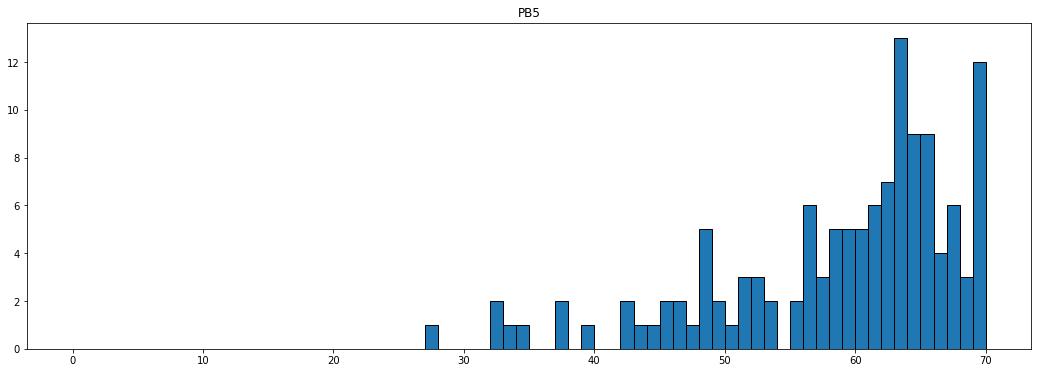

In [33]:
## PB5
plt.figure(figsize=(18,6))
plt.title('PB5')
plt.hist(finedata.PB5.tolist(), bins=range(0,71,1), edgecolor='k')
plt.show()

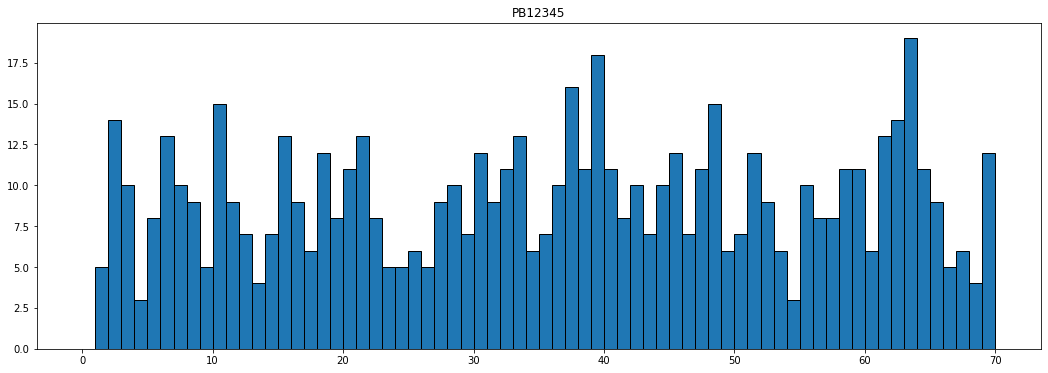

In [36]:
## PB12345
plt.figure(figsize=(18,6))
plt.title('PB12345')
X = finedata.PB1.tolist() + finedata.PB2.tolist() + finedata.PB3.tolist() + finedata.PB4.tolist() + finedata.PB5.tolist()
plt.hist(X, bins=range(0,71,1), edgecolor='k')
plt.show()

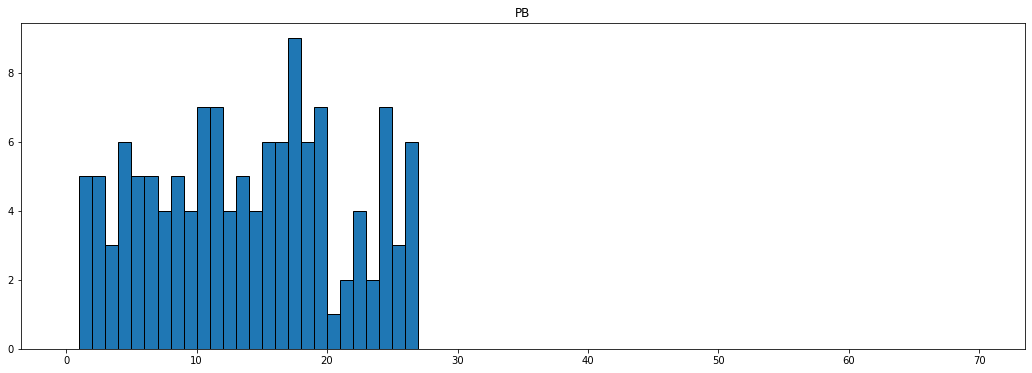

In [32]:
## PB
plt.figure(figsize=(18,6))
plt.title('PB')
plt.hist(finedata.PB.tolist(), bins=range(0,71,1), edgecolor='k')
plt.show()

In [27]:
X.count(69)

12